In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


import sys
path_to_mavenn_local = '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_local'
sys.path.insert(0,path_to_mavenn_local)

import mavenn
from mavenn.src.utils import get_example_dataset

In [2]:
#mavenn.demo(name='NAsortseq')

In [3]:
sequences, bin_counts = get_example_dataset(name='Sort-Seq')

In [4]:
bin_counts.shape

(50518, 10)

In [5]:
NAR = mavenn.Model(regression_type='NA',
                   X=sequences, 
                   y=bin_counts, 
                   gpmap_type='additive',
                   monotonic=False,
                   learning_rate=0.001,
                   alphabet='dna',
                   ohe_single_batch_size=50000)

NAR.fit(epochs=30, 
        early_stopping=True, 
        early_stopping_patience=5, 
        verbose=1)

Train on 40414 samples, validate on 10104 samples
Epoch 1/30
40414/40414 [==============================] - 2s 38us/step - loss: 1.0915 - val_loss: 1.0903
Epoch 2/30
40414/40414 [==============================] - 1s 29us/step - loss: 1.0891 - val_loss: 1.0887
Epoch 3/30
40414/40414 [==============================] - 1s 35us/step - loss: 1.0885 - val_loss: 1.0884
Epoch 4/30
40414/40414 [==============================] - 1s 31us/step - loss: 1.0884 - val_loss: 1.0887
Epoch 5/30
40414/40414 [==============================] - 1s 31us/step - loss: 1.0884 - val_loss: 1.0883
Epoch 6/30
40414/40414 [==============================] - 1s 32us/step - loss: 1.0884 - val_loss: 1.0883
Epoch 7/30
40414/40414 [==============================] - 1s 33us/step - loss: 1.0883 - val_loss: 1.0883
Epoch 8/30
40414/40414 [==============================] - 1s 31us/step - loss: 1.0883 - val_loss: 1.0888
Epoch 9/30
40414/40414 [==============================] - 1s 34us/step - loss: 1.0883 - val_loss: 1.0885
Epoch

In [6]:
loss_history = NAR.model.history

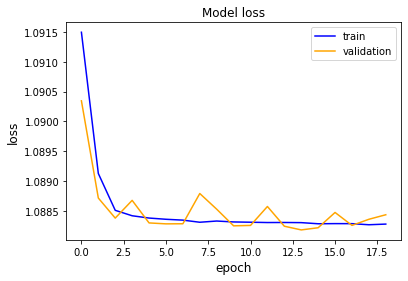

In [7]:
plt.plot(loss_history.history['loss'], color='blue')
plt.plot(loss_history.history['val_loss'], color='orange')
plt.title('Model loss', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.legend(['train', 'validation'])
plt.show()

In [8]:
NAR.get_nn().summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_labels_input (InputLay (None, 166)          0                                            
__________________________________________________________________________________________________
Sequence_only (Lambda)          (None, 156)          0           Sequence_labels_input[0][0]      
__________________________________________________________________________________________________
phiPrime (Dense)                (None, 1)            157         Sequence_only[0][0]              
__________________________________________________________________________________________________
fix_diffeomorphic_mode (fixDiff (None, 1)            0           phiPrime[0][0]                   
__________________________________________________________________________________________________
phi (Dense

In [9]:
NAR.get_nn()

In [10]:
phi = NAR.gpmap(sequences)

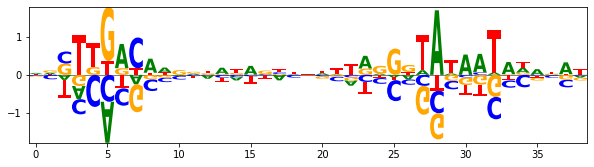

In [21]:
import logomaker
theta_df = pd.DataFrame(NAR.get_nn().layers[2].get_weights()[0].reshape(39,4),columns=['A','C','G','T'])
logomaker.Logo(theta_df,center_values=False)

In [12]:
phi_range = np.linspace(min(phi),max(phi),500)

In [13]:
noise_model = NAR.na_noisemodel(phi_range)

[Text(0.5, 0, '-8.30'), Text(20.5, 0, '-2'), Text(40.5, 0, '3.215')]

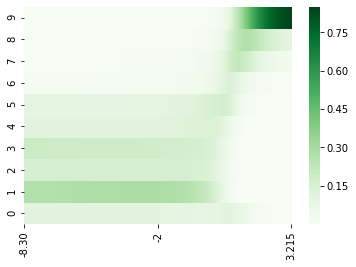

In [14]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,4))
if noise_model.T[noise_model.T.shape[0]-1][0]>noise_model.T[noise_model.T.shape[0]-1][noise_model.T.shape[1]-1]:
    ax = sns.heatmap(pd.DataFrame(noise_model.T).loc[::1,::-1],cmap='Greens')
else:
    ax = sns.heatmap(noise_model.T,cmap='Greens')    
ax.invert_yaxis()
ax.set_xticks(([0,int(len(phi_range)/2),len(phi_range)-2]), minor=False)
middle_tick = str(phi_range[int(len(phi_range)/2)])
ax.set_xticklabels(([str(phi_range[0])[0:5],middle_tick[0:2],str(phi_range[len(phi_range)-1])[0:5]]), minor=False)

In [15]:
#noise_model_no_gf, phi_range_no_gf, latent_trait_no_gf = NAR.na_noisemodel(sequences, gauge_fix=False)

In [16]:
# fig, ax = plt.subplots(figsize=(6,4))
# if noise_model.T[noise_model_no_gf.T.shape[0]-1][0]>noise_model_no_gf.T[noise_model_no_gf.T.shape[0]-1][noise_model_no_gf.T.shape[1]-1]:
#     ax = sns.heatmap(pd.DataFrame(noise_model_no_gf.T).loc[::1,::-1],cmap='Greens')
# else:
#     ax = sns.heatmap(noise_model_no_gf.T,cmap='Greens')    
# ax.invert_yaxis()
# ax.set_xticks(([0,int(len(phi_range_no_gf)/2),len(phi_range_no_gf)-2]), minor=False)
# middle_tick = str(phi_range_no_gf[int(len(phi_range_no_gf)/2)])
# ax.set_xticklabels(([str(phi_range_no_gf[0])[0:5],middle_tick[0:5],str(phi_range_no_gf[len(phi_range)-1])[0:5]]), minor=False)

In [17]:
# theta_df = pd.DataFrame(NAR.return_theta().reshape(39,4),columns=['A','C','G','T'])
# import logomaker
# logomaker.Logo(theta_df)

In [18]:
NAR.estimate_predictive_info(sequences,bin_counts)

0.3098808221646475


In [22]:
from mavenn.src.utils import mi_mixed

In [24]:
y_hat = NAR.predict(sequences).reshape(-1,10)

In [34]:
#mi_mixed(bin_counts.ravel()[0:50000], y_hat.ravel()[0:50000])

(0.09266461153894312, 0.004791404096462745)

In [ ]:
# #additive_model = K.function([model.layers[0].input],[model.layers[1].output])
# phi = NAR.gpmap(sequences)
# p_of_b_given_phi = NAR.na_noisemodel(phi)

In [ ]:
# MI = 0

# # M is total counts
# M = np.sum(bin_counts)

# # c_ib is counts of sequences i in bin b

# # This is p(b), but need to double check
# # i.e. fraciton of counts in bin i
# p_of_b = np.sum(bin_counts,axis=0)/M

# for sequence_index in range(len(sequences)):
#     # compute file for a sequence
#     #phi_i = additive_model([test_input_sequences_tensor2[sequence_index].reshape(-1,156)])[0][0]
#     #phi_i = additive_model([test_input_sequences_tensor2[sequence_index].reshape(-1,156)])[0][0]
    
#     phi_i = phi[sequence_index]
#     # compute p(bin|phi)
#     #p_of_b_given_phi_i = noise_model.predict(phi_i)
#     p_of_b_given_phi_i = p_of_b_given_phi[sequence_index]

#     # MI summand summed over b
#     MI+=np.sum(bin_counts[sequence_index]*np.log2((p_of_b_given_phi_i/p_of_b)))
# print(MI/M)